<a href="https://colab.research.google.com/github/ai4vic/ejemplo2/blob/main/Practica29SVMImbalanceEvaluacion_Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones
## 1. Carga y exploración del dataset

Utiliza el dataset breast_cancer

Verifica la distribución de clases.

Visualiza con un gráfico la distribución y la

Distribución de clases:
 target
benign       357
malignant    212
Name: count, dtype: int64


<ipython-input-1-a626ddaaf17c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


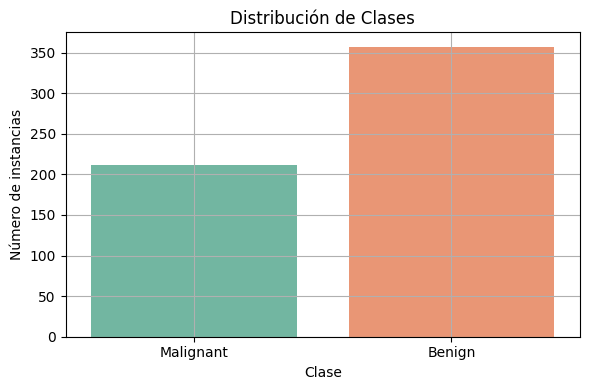

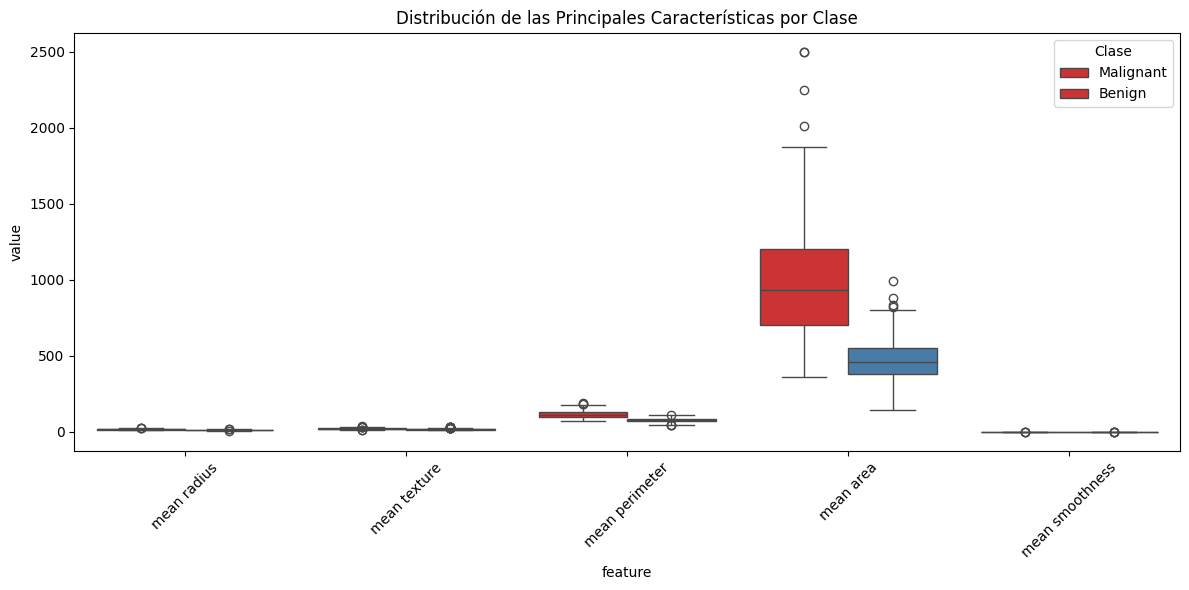

In [ ]:
# 🔢 Carga y exploración del dataset Breast Cancer

from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Combinar X e y en un solo DataFrame
df = pd.concat([X, y], axis=1)

# 📊 Verificar la distribución de clases
class_distribution = y.value_counts().rename(index={0: 'malignant', 1: 'benign'})
print("Distribución de clases:\n", class_distribution)

# 📈 Visualizar la distribución de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribución de Clases')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.ylabel('Número de instancias')
plt.xlabel('Clase')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Visualizar algunas características principales (5 primeras)
plt.figure(figsize=(12, 6))
df_melt = df.melt(id_vars='target', value_vars=data.feature_names[:5], var_name='feature', value_name='value')
sns.boxplot(x='feature', y='value', hue='target', data=df_melt, palette='Set1')
plt.title('Distribución de las Principales Características por Clase')
plt.xticks(rotation=45)
plt.legend(title='Clase', labels=['Malignant', 'Benign'])
plt.tight_layout()
plt.show()


# 2. Entrenamiento base con SVM

Usa un modelo SVM con kernel RBF.

Aplica StratifiedKFold con 5 particiones.

Evalúa con métricas por clase: precisión, recall, F1-score.

Calcula y reporta métricas promedio y por clase.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Crear un pipeline: escalamiento + SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', random_state=42))
])

# Crear StratifiedKFold con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Obtener predicciones usando validación cruzada
y_pred = cross_val_predict(pipeline, X, y, cv=cv)

# 🧮 Reporte de métricas por clase
report = classification_report(y, y_pred, target_names=['Malignant', 'Benign'], output_dict=True)

# Convertir el reporte a DataFrame para visualizar mejor
report_df = pd.DataFrame(report).transpose()

# Mostrar el reporte
print("📊 Reporte de métricas por clase y promedios:\n")
print(report_df)



📊 Reporte de métricas por clase y promedios:

              precision    recall  f1-score     support
Malignant      0.980676  0.957547  0.968974  212.000000
Benign         0.975138  0.988796  0.981919  357.000000
accuracy       0.977153  0.977153  0.977153    0.977153
macro avg      0.977907  0.973171  0.975447  569.000000
weighted avg   0.977202  0.977153  0.977096  569.000000


# 3. Análisis del problema de desbalance

Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?

Reporta matriz de confusión promedio.

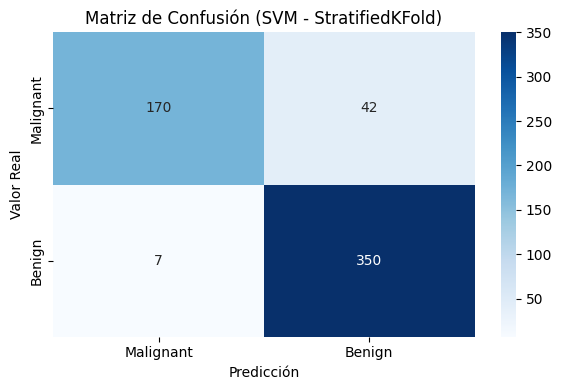

🔍 Análisis del Desempeño por Clase:

La clase con peor desempeño en términos de F1-score es **Malignant**.
Esto puede estar relacionado con el desequilibrio de clases en el conjunto de datos:
- Clase 'Malignant': 212 instancias
- Clase 'Benign': 357 instancias

La diferencia en el F1-score entre ambas clases es de aproximadamente 0.061,
lo cual indica que el modelo tiene un sesgo hacia la clase mayoritaria, en este caso 'Benign'.

Esto es común en conjuntos de datos desbalanceados, donde el modelo tiende a predecir más correctamente la clase con más ejemplos.


In [ ]:
# 📊 Matriz de confusión y análisis del desbalance

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (SVM - StratifiedKFold)')
plt.tight_layout()
plt.show()

# 🔍 Análisis de métricas por clase
# Suponiendo que ya tienes el DataFrame `report_df` con los resultados

malignant_f1 = report_df.loc["Malignant", "f1-score"]
benign_f1 = report_df.loc["Benign", "f1-score"]

# Determinar cuál clase tiene peor desempeño
worst_class = "Malignant" if malignant_f1 < benign_f1 else "Benign"
performance_gap = abs(malignant_f1 - benign_f1)

# Imprimir análisis
print("🔍 Análisis del Desempeño por Clase:\n")
print(f"La clase con peor desempeño en términos de F1-score es **{worst_class}**.")
print("Esto puede estar relacionado con el desequilibrio de clases en el conjunto de datos:")
print(f"- Clase 'Malignant': {class_distribution['malignant']} instancias")
print(f"- Clase 'Benign': {class_distribution['benign']} instancias")
print(f"\nLa diferencia en el F1-score entre ambas clases es de aproximadamente {performance_gap:.3f},")
print("lo cual indica que el modelo tiene un sesgo hacia la clase mayoritaria, en este caso 'Benign'.")
print("\nEsto es común en conjuntos de datos desbalanceados, donde el modelo tiende a predecir más correctamente la clase con más ejemplos.")



# 4. Aplicación de SMOTE

Aplica SMOTE solo al conjunto de entrenamiento dentro de cada fold.

Entrena nuevamente la SVM.

Compara métricas antes y después.

In [ ]:
!pip install -U imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
import pandas as pd
import numpy as np # Import numpy for np.mean

# Inicialización
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='rbf', random_state=42)
reports_smote = []

# Validación cruzada con SMOTE en el conjunto de entrenamiento
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Aplicar SMOTE al conjunto de entrenamiento
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Entrenar y predecir
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    # Generar métricas para este fold
    fold_report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'], output_dict=True)
    reports_smote.append(fold_report)

# Promediar métricas por clase
avg_report_data = {}

# Aggregate data from each fold
for report in reports_smote:
    for class_name, metrics in report.items():
        # Ensure the outer key (class_name) exists in avg_report_data
        if class_name not in avg_report_data:
             # Initialize as a dictionary if it's a metric group (like 'Malignant')
             # or a list if it's a scalar metric (like 'accuracy')
             if isinstance(metrics, dict):
                 avg_report_data[class_name] = {}
             else:
                 avg_report_data[class_name] = []

        if isinstance(metrics, dict): # Handle class metrics and avg metrics that are dicts
            for metric_name, value in metrics.items():
                # Ensure the inner key (metric_name) exists for this class_name
                if metric_name not in avg_report_data[class_name]:
                    avg_report_data[class_name][metric_name] = []
                avg_report_data[class_name][metric_name].append(value)
        elif class_name in avg_report_data: # Handle accuracy (scalar) - append directly to list
             avg_report_data[class_name].append(metrics)

# Calculate averages
final_avg_report = {}
for key, value in avg_report_data.items():
    if isinstance(value, dict): # Average metrics for classes and avg types that were dicts
        final_avg_report[key] = {metric_name: np.mean(metric_values) for metric_name, metric_values in value.items()}
    elif isinstance(value, list): # Average metrics for accuracy (was list of scalars)
         if value: # Check if list is not empty
             final_avg_report[key] = np.mean(value)

# Convert the averaged report to DataFrame for display
# We can directly create the DataFrame from the final_report_dict_for_df structure
# Ensure the structure is suitable for pandas DataFrame constructor
final_report_dict_for_df = {}
for key, value in final_avg_report.items():
    if isinstance(value, dict):
        final_report_dict_for_df[key] = value
    # Scalar values like 'accuracy' might need a different approach if you want them
    # in the same DataFrame. For simplicity, we'll create the DataFrame from the dicts
    # and print accuracy separately.

report_avg_df = pd.DataFrame(final_report_dict_for_df).T

# Display accuracy separately if it exists
if 'accuracy' in final_avg_report:
    print(f"Accuracy (average across folds): {final_avg_report['accuracy']:.4f}")


# Mostrar resultados
print("\n📊 Reporte Promedio con SMOTE:\n")
print(report_avg_df)

Accuracy (average across folds): 0.9034

📊 Reporte Promedio con SMOTE:

              precision    recall  f1-score  support
Malignant      0.890934  0.853821  0.867885     42.4
Benign         0.917270  0.932903  0.923525     71.4
macro avg      0.904102  0.893362  0.895705    113.8
weighted avg   0.907520  0.903385  0.902798    113.8


Visualización y conclusiones

Usa un gráfico de barras comparando F1 por clase antes y después.

Comenta las ventajas y riesgos de aplicar SMOTE con SVM.

Explica cuándo conviene usar otras técnicas como One-Sided Selection o ADASYN.



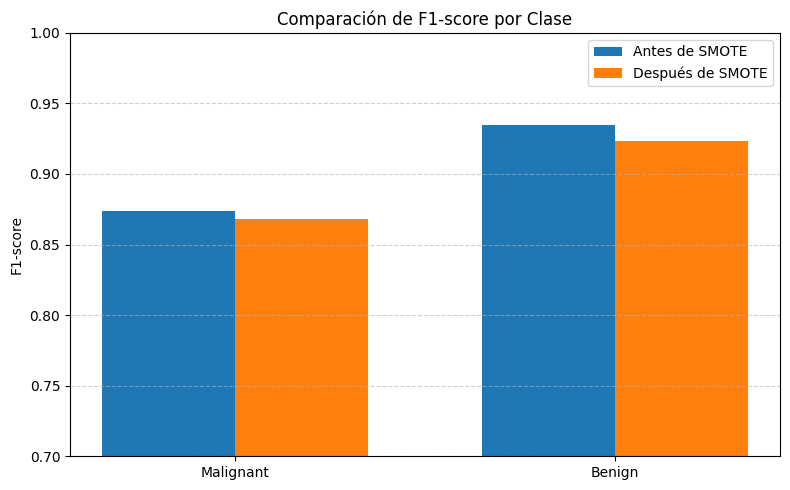

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer F1-scores por clase antes y después de SMOTE
f1_before = report_df.loc[['Malignant', 'Benign'], 'f1-score']
f1_after = report_avg_df.loc[['Malignant', 'Benign']]['f1-score']

# Crear gráfico de comparación
labels = ['Malignant', 'Benign']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, f1_before, width, label='Antes de SMOTE')
plt.bar(x + width/2, f1_after, width, label='Después de SMOTE')
plt.xticks(x, labels)
plt.ylabel('F1-score')
plt.title('Comparación de F1-score por Clase')
plt.ylim(0.7, 1.0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
